No handles with labels found to put in legend.


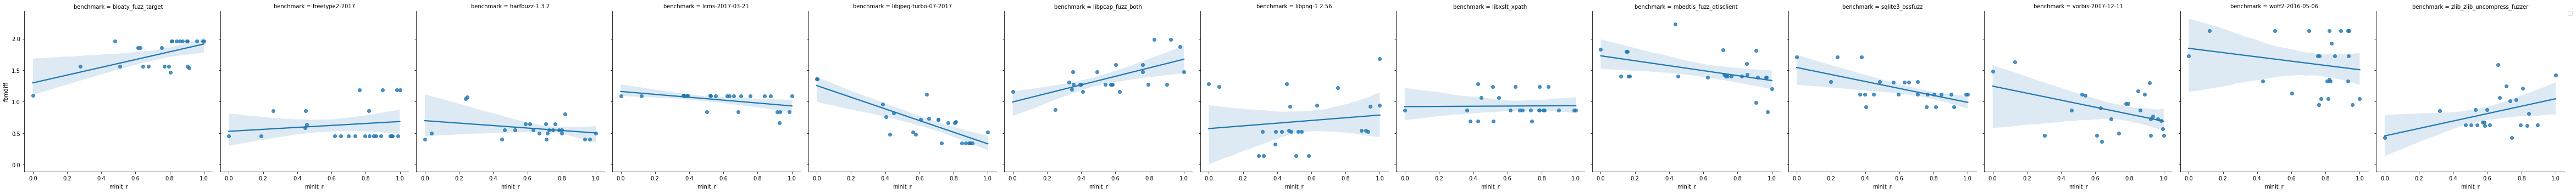

No handles with labels found to put in legend.


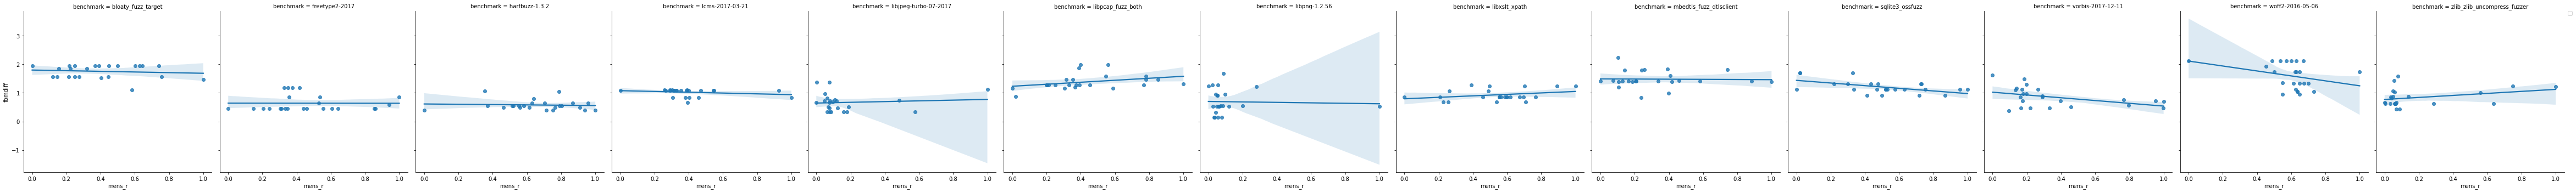

No handles with labels found to put in legend.


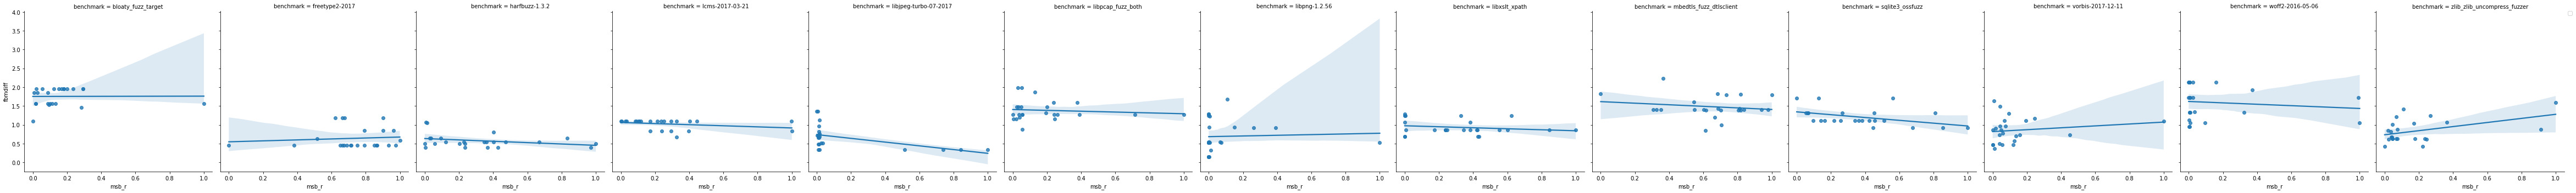

In [45]:
### import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

fuzzers = ["afl", "libfuzzer", "aflplusplus", "entropic", "honggfuzz"]
sampled_df = pd.read_csv("tmp.csv")

sampled_df["fbsdiff"] = abs(sampled_df["rank"] - sampled_df["fbsranks"])
sampled_df["fbmdiff"] = abs(sampled_df["rank"] - sampled_df["fbmranks"])
m = sampled_df.groupby(["benchmark", "corpus_size", "mean_size_bytes"]).mean().reset_index()
m['msb_r'] = m.groupby('benchmark')['mean_size_bytes'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
m['mens_r'] = m.groupby('benchmark')['mean_exec_ns'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
m['minit_r'] = m.groupby('benchmark')['initial_coverage'].apply(lambda x: (x-x.min())/(x.max()-x.min()))

# m = m[m["benchmark"] == "woff2-2016-05-06"]

# g = sns.scatterplot(data=m, x="minit_r", y="fbsdiff", hue="benchmark")
# g.set(xlim=(0, 1000))
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.show()

# g = sns.lmplot(data=m, x="minit_r", y="fbmdiff", hue="benchmark")

# g = sns.FacetGrid(m, row="benchmark")
# g.map_dataframe(sns.scatterplot, x="minit_r", y="fbmdiff")
# plt.show()

g = sns.lmplot(data=m, x="minit_r", y="fbmdiff", col="benchmark")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

g = sns.lmplot(data=m, x="mens_r", y="fbmdiff", col="benchmark")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

g = sns.lmplot(data=m, x="msb_r", y="fbmdiff", col="benchmark")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

